In [ ]:
from google.colab import drive
from math import pi
import numpy as np
from scipy import interpolate 
import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


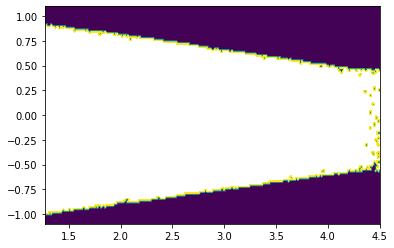

In [ ]:
mask = np.load('/content/gdrive/My Drive/Experimental MRV/low_snr_re_162/axisymm_nozzle_Re162_low_SNR_mask.npz', allow_pickle = True)

mask = mask['u_z']

x = np.linspace(1.647955e-2/0.013, 5.850242e-2/0.013 , 255)
y = np.linspace(-2.857143e-2/2/0.013, 2.857143e-2/2/0.013, 128)
xx, yy = np.meshgrid(x, y)

fig, axs = plt.subplots(1, 1)
axs_0_0 = axs.tricontourf(xx.flatten(), yy.flatten() , mask.flatten(), 100)

In [ ]:
data = np.load('/content/gdrive/My Drive/Experimental MRV/low_snr_re_162/axisymm_nozzle_Re162_low_SNR.npz', allow_pickle = True)
uz = np.array(data['u_z'])
ur = np.array(data['u_r'])

In [ ]:
print(uz)
print(np.shape(uz))
np.max(uz)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 255)


2.140526

In [ ]:
print(ur)
print(np.shape(ur))
np.max(ur)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 255)


0.41746694

In [ ]:
ur = np.flip(ur, axis = 0)

In [ ]:
x = np.linspace(1.647955e-2/0.013, 5.850242e-2/0.013 , 255)
y = np.linspace(-2.857143e-2/2/0.013, 2.857143e-2/2/0.013, 128)
xx, yy = np.meshgrid(x, y)
l = np.ones((1,128))*-0.05
n =  np.linspace(1.647955e-2/0.013, 5.850242e-2/0.013 , 128)

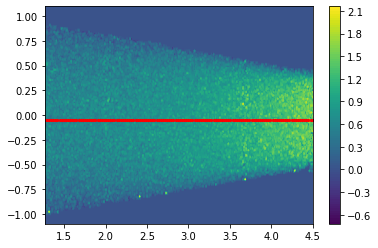

In [ ]:
fig, axs = plt.subplots(1, 1)
axs_0_0 = axs.tricontourf(xx.flatten(), yy.flatten() , uz.flatten(), 100)
fig.colorbar(axs_0_0, ax=axs)
plt.scatter(n,l, c = 'red', s = 5)

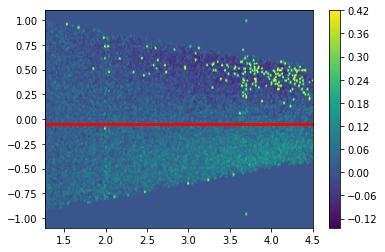

In [ ]:
fig, axs = plt.subplots(1, 1)
axs_0_0 = axs.tricontourf(xx.flatten(), yy.flatten() , ur.flatten(), 100)
fig.colorbar(axs_0_0, ax=axs)
plt.scatter(n,l, c = 'red', s = 5)

In [ ]:
axial_velocity = uz[63:254, :]
print(np.shape(axial_velocity))

radial_velocity = ur[63:254, :]
print(np.shape(radial_velocity))

(65, 255)
(65, 255)


In [ ]:
r = np.linspace(-0.05, 2.857143e-2/2/0.013, 65)
a = np.linspace(1.647955e-2/0.013, 5.850242e-2/0.013 , 255)
aa, rr = np.meshgrid(a, r)
print(np.shape(aa))
print(np.shape(rr))

(65, 255)
(65, 255)


In [ ]:
print(np.mean(uz))
print(np.var(uz))
print(np.mean(uz) + 3*np.sqrt(np.var(uz)))
print(np.mean(uz) - 3*np.sqrt(np.var(uz)))

0.3952024
0.15965503
1.5939080715179443
-0.8035032749176025


In [ ]:
print(np.mean(ur))
print(np.var(ur))
print(np.mean(ur) + 3*np.sqrt(np.var(ur)))
print(np.mean(ur) - 3*np.sqrt(np.var(ur)))

0.004074721
0.0027312532
0.16085890168324113
-0.15270945942029357


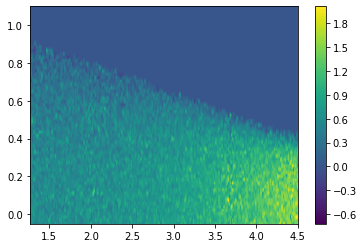

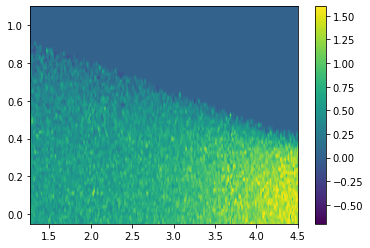

In [ ]:
fig, axs = plt.subplots(1, 1)
axs_0_0 = axs.tricontourf(aa.flatten(), rr.flatten() , axial_velocity.flatten(), 100)
fig.colorbar(axs_0_0, ax=axs)

for n in range(4):
  for i in range(65):
    for j in range(255):
      if axial_velocity[i, j] > 1.59 or axial_velocity[i, j] < -0.80:
        if i == 0 and j == 0:
          axial_velocity[i,j] = (axial_velocity[i+1, j] + axial_velocity[i, j+1])/2
        elif i == 64 and j == 0:
          axial_velocity[i,j] = (axial_velocity[i-1, j] + axial_velocity[i, j+1])/2
        elif i == 64 and j == 254:
          axial_velocity[i,j] = (axial_velocity[i-1, j] + axial_velocity[i, j-1])/2
        elif i == 0 and j == 254:
          axial_velocity[i,j] = (axial_velocity[i+1, j] + axial_velocity[i, j-1])/2
        elif (i == 0 and j != 0) or (i == 0 and j != 254):
          axial_velocity[i,j] = (axial_velocity[i, j-1] + axial_velocity[i, j+1] + axial_velocity[i+1, j])/3
        elif (i == 65 and j != 0) or (i == 65 and j != 254):
          axial_velocity[i,j] = (axial_velocity[i, j-1] + axial_velocity[i, j+1] + axial_velocity[i-1, j])/3
        elif (j == 0 and i != 0) or (j == 0 and i != 65):
          axial_velocity[i,j] = (axial_velocity[i-1, j] + axial_velocity[i+1, j] + axial_velocity[i, j+1])/3
        elif (j == 254 and i != 0) or (j == 254 and i != 65):
          axial_velocity[i,j] = (axial_velocity[i-1, j] + axial_velocity[i+1, j] + axial_velocity[i, j-1])/3
        else:
          axial_velocity[i,j] = (axial_velocity[i-1, j] + axial_velocity[i+1, j] + axial_velocity[i, j-1] + axial_velocity[i, j+1])/4

fig1, axs = plt.subplots(1, 1)
axs_0_0 = axs.tricontourf(aa.flatten(), rr.flatten() , axial_velocity.flatten(), 100)
fig1.colorbar(axs_0_0, ax=axs)

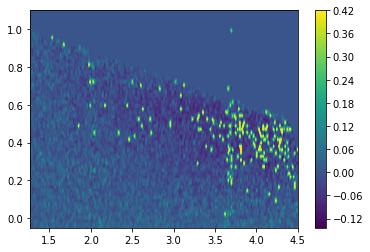

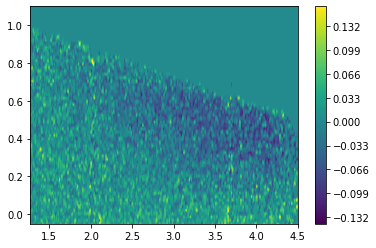

In [ ]:
fig, axs = plt.subplots(1, 1)
axs_0_0 = axs.tricontourf(aa.flatten(), rr.flatten() , radial_velocity.flatten(), 100)
fig.colorbar(axs_0_0, ax=axs)

for n in range(4):
  for i in range(65):
    for j in range(255):
      if radial_velocity[i, j] > 0.16 or radial_velocity[i, j] < -0.153:
        if i == 0 and j == 0:
          radial_velocity[i,j] = (radial_velocity[i+1, j] + radial_velocity[i, j+1])/2
        elif i == 64 and j == 0:
          radial_velocity[i,j] = (radial_velocity[i-1, j] + radial_velocity[i, j+1])/2
        elif i == 64 and j == 254:
          radial_velocity[i,j] = (radial_velocity[i-1, j] + radial_velocity[i, j-1])/2
        elif i == 0 and j == 254:
          radial_velocity[i,j] = (radial_velocity[i+1, j] + radial_velocity[i, j-1])/2
        elif (i == 0 and j != 0) or (i == 0 and j != 254):
          radial_velocity[i,j] = (radial_velocity[i, j-1] + radial_velocity[i, j+1] + radial_velocity[i+1, j])/3
        elif (i == 65 and j != 0) or (i == 65 and j != 254):
          radial_velocity[i,j] = (radial_velocity[i, j-1] + radial_velocity[i, j+1] + radial_velocity[i-1, j])/3
        elif (j == 0 and i != 0) or (j == 0 and i != 65):
          radial_velocity[i,j] = (radial_velocity[i-1, j] + radial_velocity[i+1, j] + radial_velocity[i, j+1])/3
        elif (j == 254 and i != 0) or (j == 254 and i != 65):
          radial_velocity[i,j] = (radial_velocity[i-1, j] + radial_velocity[i+1, j] + radial_velocity[i, j-1])/3
        else:
          radial_velocity[i,j] = (radial_velocity[i-1, j] + radial_velocity[i+1, j] + radial_velocity[i, j-1] + radial_velocity[i, j+1])/4

fig1, axs = plt.subplots(1, 1)
axs_0_0 = axs.tricontourf(aa.flatten(), rr.flatten() , radial_velocity.flatten(), 100)
fig1.colorbar(axs_0_0, ax=axs)

In [ ]:
f_axial_velocity = interpolate.RectBivariateSpline(r, a, axial_velocity)
f_radial_velocity = interpolate.RectBivariateSpline(r, a , radial_velocity)

In [ ]:
x = np.linspace(1.647955e-2/0.013, 5.850242e-2/0.013, 800)
y = np.linspace(-2.857143e-2/2/0.013, 2.857143e-2/2/0.013, 200)
z = np.linspace(-2.857143e-2/2/0.013, 2.857143e-2/2/0.013, 200)

xx, yy, zz = np.meshgrid(x, y, z)

In [ ]:
rr = np.sqrt(np.add(np.square(yy), np.square(zz)))
thetatheta = np.arctan2(yy,zz)

In [ ]:
def uxuyuz(x, y, z, xx, rr, thetatheta, f_axial_velocity, f_radial_velocity):
    ux = np.zeros((len(y), len(x), len(z)))
    uy = np.zeros((len(y), len(x), len(z)))
    uz = np.zeros((len(y), len(x), len(z)))
    for i in range(len(y)):
        print(i)
        for j in range(len(x)):
            for k in range(len(z)):
                ux[i, j, k] = f_axial_velocity(rr[i, j, k], xx[i, j, k])
                uy[i, j, k] = f_radial_velocity(rr[i, j, k], xx[i, j, k])*np.sin(thetatheta[i, j, k])
                uz[i, j, k] = f_radial_velocity(rr[i, j, k], xx[i, j, k])*np.cos(thetatheta[i, j, k])
    
    return ux, uy, uz

In [ ]:
ux, uy, uz = uxuyuz(x, y, z, xx, rr, thetatheta, f_axial_velocity, f_radial_velocity)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


Text(0.5, 0.98, 'Noisy Velocity Field (Reference used by PINN)')

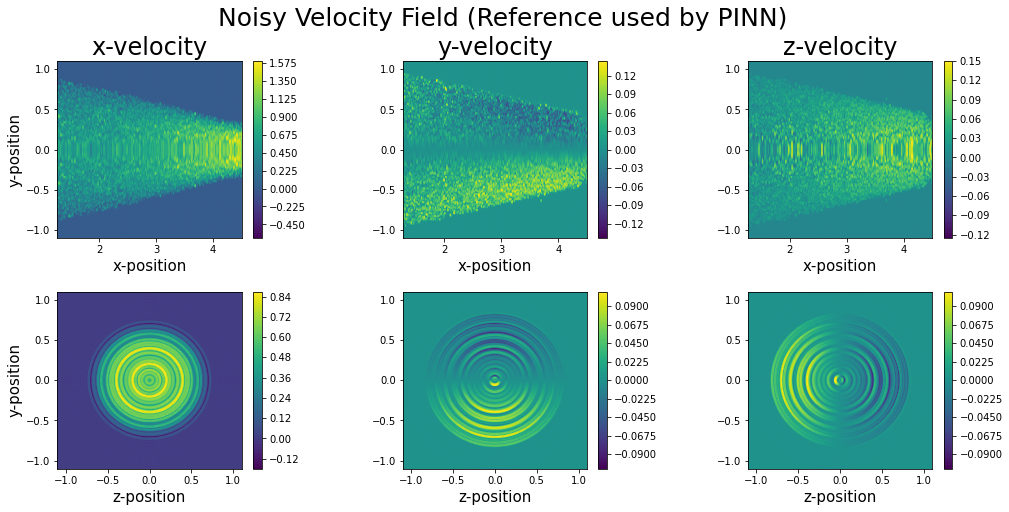

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(16.5, 7.5))

axs_0_0 = axs[0, 0].tricontourf(xx[:, :, 75].flatten(), yy[:, :, 75].flatten() , ux[:, :, 75].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0, 0])

axs_0_1 = axs[0, 1].tricontourf(xx[:, :, 75].flatten(), yy[:, :, 75].flatten() , uy[:, :, 75].flatten(), 100)
fig.colorbar(axs_0_1, ax=axs[0, 1])

axs_0_2 = axs[0, 2].tricontourf(xx[:, :, 75].flatten(), yy[:, :, 75].flatten() , uz[:, :, 75].flatten(), 100)
fig.colorbar(axs_0_2, ax=axs[0, 2])

axs_1_0 = axs[1, 0].tricontourf(zz[:, 300, :].flatten(), yy[:, 300, :].flatten() , ux[:, 300, :].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1, 0])

axs_1_1 = axs[1, 1].tricontourf(zz[:, 300, :].flatten(), yy[:, 300, :].flatten() , uy[:, 300, :].flatten(), 100)
fig.colorbar(axs_1_1, ax=axs[1, 1])

axs_1_2 = axs[1, 2].tricontourf(zz[:, 300, :].flatten(), yy[:, 300, :].flatten() , uz[:, 300, :].flatten(), 100)
fig.colorbar(axs_1_2, ax=axs[1, 2])

fig.subplots_adjust(wspace = 0.5, hspace = 0.3)

axs[0, 0].set_title('x-velocity', size =15)
axs[0, 1].set_title('y-velocity', size =15)
axs[0, 2].set_title('z-velocity', size =15)

axs[0, 0].set_xlabel('x-position', size =15)
axs[0, 1].set_xlabel('x-position', size =15)
axs[0, 2].set_xlabel('x-position', size =15)

axs[1, 0].set_xlabel('z-position', size =15)
axs[1, 1].set_xlabel('z-position', size =15)
axs[1, 2].set_xlabel('z-position', size =15)

axs[0, 0].set_ylabel('y-position', size =15)
axs[1, 0].set_ylabel('y-position', size =15)

fig.suptitle('Noisy Velocity Field (Reference used by PINN)', size = 20)

Text(0.5, 0.98, 'Noisy Velocity Field (Reference used by PINN)')

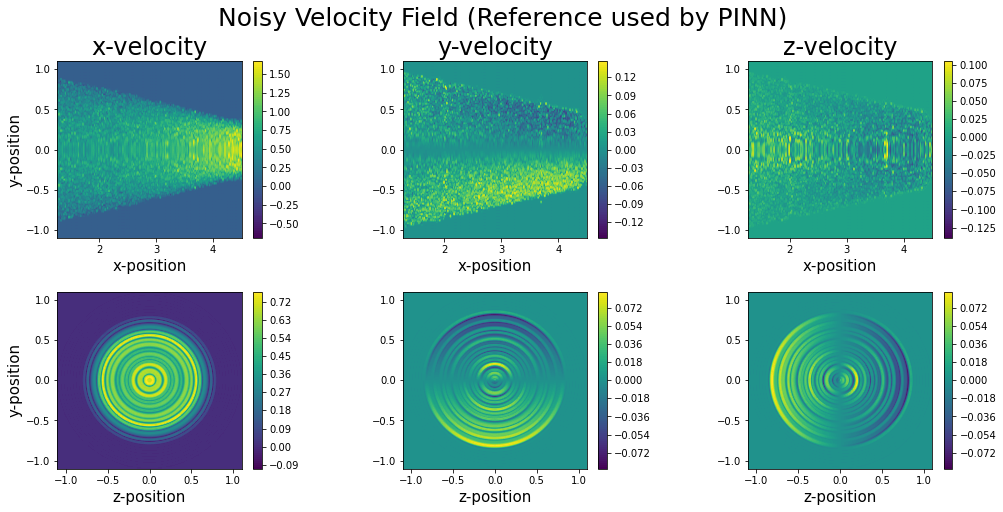

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(16.5, 7.5))

axs_0_0 = axs[0, 0].tricontourf(xx[:, :, 120].flatten(), yy[:, :, 120].flatten() , ux[:, :, 120].flatten(), 100)
fig.colorbar(axs_0_0, ax=axs[0, 0])

axs_0_1 = axs[0, 1].tricontourf(xx[:, :, 120].flatten(), yy[:, :, 120].flatten() , uy[:, :, 120].flatten(), 100)
fig.colorbar(axs_0_1, ax=axs[0, 1])

axs_0_2 = axs[0, 2].tricontourf(xx[:, :, 120].flatten(), yy[:, :, 120].flatten() , uz[:, :, 120].flatten(), 100)
fig.colorbar(axs_0_2, ax=axs[0, 2])

axs_1_0 = axs[1, 0].tricontourf(zz[:, 225, :].flatten(), yy[:, 225, :].flatten() , ux[:, 225, :].flatten(), 100)
fig.colorbar(axs_1_0, ax=axs[1, 0])

axs_1_1 = axs[1, 1].tricontourf(zz[:, 225, :].flatten(), yy[:, 225, :].flatten() , uy[:, 225, :].flatten(), 100)
fig.colorbar(axs_1_1, ax=axs[1, 1])

axs_1_2 = axs[1, 2].tricontourf(zz[:, 225, :].flatten(), yy[:, 225, :].flatten() , uz[:, 225, :].flatten(), 100)
fig.colorbar(axs_1_2, ax=axs[1, 2])

fig.subplots_adjust(wspace = 0.5, hspace = 0.3)

axs[0, 0].set_title('x-velocity', size =15)
axs[0, 1].set_title('y-velocity', size =15)
axs[0, 2].set_title('z-velocity', size =15)

axs[0, 0].set_xlabel('x-position', size =15)
axs[0, 1].set_xlabel('x-position', size =15)
axs[0, 2].set_xlabel('x-position', size =15)

axs[1, 0].set_xlabel('z-position', size =15)
axs[1, 1].set_xlabel('z-position', size =15)
axs[1, 2].set_xlabel('z-position', size =15)

axs[0, 0].set_ylabel('y-position', size =15)
axs[1, 0].set_ylabel('y-position', size =15)

fig.suptitle('Noisy Velocity Field (Reference used by PINN)', size = 20)

In [ ]:
np.save('/content/gdrive/My Drive/Experimental MRV/low_snr_re_162/ux.npy',ux, allow_pickle=True)
np.save('/content/gdrive/My Drive/Experimental MRV/low_snr_re_162/uy.npy',uy, allow_pickle=True)
np.save('/content/gdrive/My Drive/Experimental MRV/low_snr_re_162/uz.npy',uz, allow_pickle=True)